<center><h1 style="color: #011f4b;">PROYECTO DE CLASE - ANÁLISIS DE SERIES DE TIEMPO</h1></center>

<center><h2 style="color: #03396c;">SERIE: ANALISIS TEMPORAL DE IMPORTACIONES</h2></center>

<span style="color: #03396c;">**Autor:**</span>
- Cesar Prieto

<h2 style="color: #03396c;">INTRODUCCION</h2>

Esta serie consta del valor FOB en dólares de las importaciones que llegan a los puertos de Colombia vía marítima y su destino final es la ciudad de Bogotá, en el periodo transcurrido entre enero del 2012 hasta diciembre de 2021, la serie es de tipo **mensual**.

**Definición:** El valor FOB en dólares de la mercancía, es valor de la mercancía en el momento que se carga a bordo del medio de transporte, en este caso el marítimo.

La serie consta de 120 observaciones, lo que corresponde a los 10 años transcurridos desde el 2012 hasta el 2021

<span style="color: #03396c;">**Descripcion de la base:**</span>
- Importaciones <span style="color: #03396c;">**MENSUALES**</span> via maritima con destino a Bogotá
- 3401 Datos tomado (Desde el 01/2012 Hasta 12/2021)
- Variable a usar: <span style="color: #03396c;">**_VAFODO_**</span>

<center><h1 style="color: #011f4b;">PRIMER ANALISIS Y DESCRIPCION DE LA SERIE</h1></center>

<h2 style="color: #011f4b;">IMPORTACION Y LIMPIEZA DE DATOS</h2>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn import __version__ as sklearn_version
from sklearn import *

import os

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
current_dir = os.getcwd()
pro_series_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
pro_series_dir

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series'

In [7]:
# Construir la ruta a la carpeta de Datos
data_folder_path = os.path.join(pro_series_dir, 'Datos')
data_folder_path = data_folder_path + os.sep
data_folder_path

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series\\Datos\\'

In [8]:
# Cargar el archivo CSV en un DataFrame de pandas
Importaciones = pd.read_csv(data_folder_path + "Importaciones.csv", sep=',')

In [9]:
Importaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FECH            143 non-null    float64
 1   VACIP           144 non-null    int64  
 2   VAFODO          144 non-null    float64
 3   FLETE           144 non-null    float64
 4   IMP1            144 non-null    float64
 5   VACID           144 non-null    float64
 6   PBK             144 non-null    float64
 7   PNK             144 non-null    float64
 8   CANU            81 non-null     float64
 9   fecha           144 non-null    object 
 10  mes             144 non-null    object 
 11  año             144 non-null    int64  
 12  fecha_completa  144 non-null    object 
dtypes: float64(8), int64(2), object(3)
memory usage: 14.8+ KB


In [10]:
#Exploracion de las variables encontradas en la base
Variables = Importaciones[['fecha_completa', 'VACIP', 'VAFODO', 'FLETE', 'IMP1', 'VACID', 'PBK', 'PNK']].copy()

# Convertir la columna 'fecha_completa' a formato de fecha
Variables['fecha_completa'] = pd.to_datetime(Variables['fecha_completa'])

Variables.info()
Variables.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_completa  144 non-null    datetime64[ns]
 1   VACIP           144 non-null    int64         
 2   VAFODO          144 non-null    float64       
 3   FLETE           144 non-null    float64       
 4   IMP1            144 non-null    float64       
 5   VACID           144 non-null    float64       
 6   PBK             144 non-null    float64       
 7   PNK             144 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 9.1 KB


fecha_completa          VACIP        VAFODO         FLETE          IMP1  \
0     2012-01-01   869285742501  1.579419e+10  1.039715e+11  9.063473e+10   
1     2012-02-01   753291179381  1.787081e+10  5.944155e+10  8.521563e+10   
2     2012-03-01   970221001405  1.969805e+10  8.800024e+10  1.190929e+11   
3     2012-04-01   829378952699  1.597839e+10  8.199698e+10  1.523165e+11   
4     2012-05-01  1041614618811  2.355538e+10  1.157984e+11  1.217380e+11   

          VACID           PBK           PNK  
0  2.243658e+12  2.727896e+10  5.725524e+09  
1  1.327547e+12  6.703622e+09  1.794043e+10  
2  1.990896e+12  2.428291e+10  5.363545e+09  
3  1.724013e+12  1.018825e+10  5.578638e+09  
4  2.454812e+12  2.360439e+10  6.344622e+09

In [11]:
Variables[['VACIP', 'VAFODO', 'FLETE', 'IMP1', 'VACID', 'PBK', 'PNK']] = Variables[['VACIP', 'VAFODO', 'FLETE', 'IMP1', 'VACID', 'PBK', 'PNK']].div(1000000000)
Variables.head(5)

fecha_completa        VACIP     VAFODO       FLETE        IMP1        VACID  \
0     2012-01-01   869.285743  15.794190  103.971527   90.634731  2243.657871   
1     2012-02-01   753.291179  17.870806   59.441549   85.215632  1327.547259   
2     2012-03-01   970.221001  19.698045   88.000244  119.092896  1990.895960   
3     2012-04-01   829.378953  15.978388   81.996980  152.316541  1724.013363   
4     2012-05-01  1041.614619  23.555380  115.798390  121.737966  2454.811904   

         PBK        PNK  
0  27.278956   5.725524  
1   6.703622  17.940430  
2  24.282915   5.363545  
3  10.188252   5.578638  
4  23.604388   6.344622

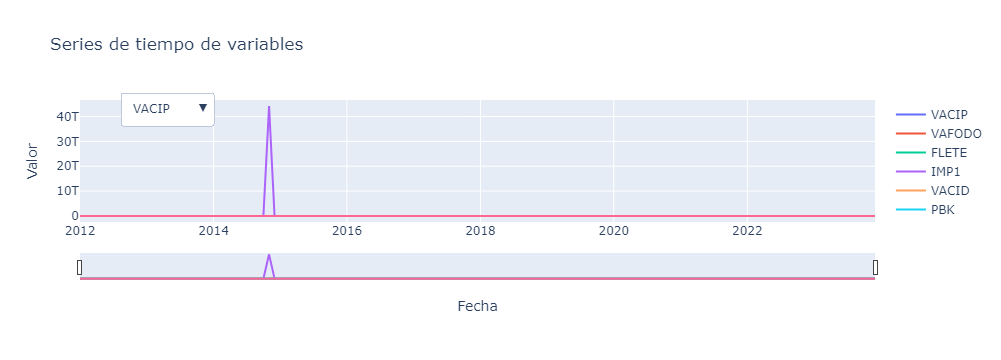

In [12]:
import plotly.graph_objects as go

# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['VACIP'], mode='lines', name='VACIP'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['VAFODO'], mode='lines', name='VAFODO'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['FLETE'], mode='lines', name='FLETE'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['IMP1'], mode='lines', name='IMP1'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['VACID'], mode='lines', name='VACID'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['PBK'], mode='lines', name='PBK'))
fig.add_trace(go.Scatter(x=Variables['fecha_completa'], y=Variables['PNK'], mode='lines', name='PNK'))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="VACIP",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False, False]},
                           {"title": "Serie de tiempo variable VACIP"}]),
                dict(label="VAFODO",
                     method="update",
                     args=[{"visible": [False, True, False, False, False, False, False]},
                           {"title": "Serie de tiempo variable VAFODO"}]),
                dict(label="FLETE",
                     method="update",
                     args=[{"visible": [False, False, True, False, False, False, False]},
                           {"title": "Serie de tiempo variable FLETE"}]),
                dict(label="IMP1",
                     method="update",
                     args=[{"visible": [False, False, False, True, False, False, False]},
                           {"title": "Serie de tiempo variable IMP1"}]),
                dict(label="VACID",
                     method="update",
                     args=[{"visible": [False, False, False, False, True, False, False]},
                           {"title": "Serie de tiempo variable VACID"}]),
                dict(label="PBK",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, True, False]},
                           {"title": "Serie de tiempo variable PBK"}]),
                dict(label="PNK",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, False, True]},
                           {"title": "Serie de tiempo variable PNK"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Series de tiempo de variables')

# Mostrar el gráfico
fig.show()

<h2 style="color: #011f4b;">ELECCION DE LA VARIABLE Y DESARROLLO DE METODOLOGIAS</h2>

En la parte anterior del codigo pudimos ver como todas las variables poseen un comportamiento bastante diferente. Por esto hemos decidido que la variable elegida para desarrollar el proyecto sera la  <span style="color: #03396c;">**_VAFODO_**</span> o mejor dicho el Valor FOB dólares de la mercancía. Valor de la mercancia  en el momento que se carga a bordo del medio de transporte  marítimo.

In [13]:
# Seleccionar solo las columnas 'fecha_completa' y 'VAFODO'
Serie = Variables[['fecha_completa', 'VAFODO']]
print(Serie)

    fecha_completa      VAFODO
0       2012-01-01   15.794190
1       2012-02-01   17.870806
2       2012-03-01   19.698045
3       2012-04-01   15.978388
4       2012-05-01   23.555380
..             ...         ...
139     2023-08-01   94.747376
140     2023-09-01   89.642116
141     2023-10-01    1.523791
142     2023-11-01  109.342708
143     2023-12-01   95.723639

[144 rows x 2 columns]


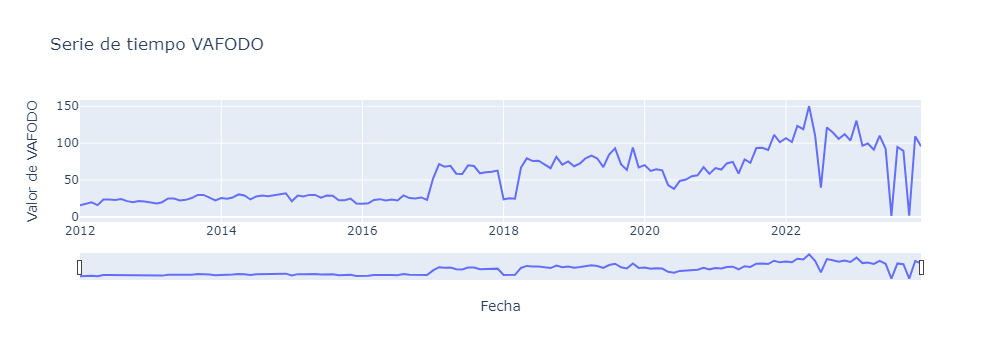

In [14]:
import plotly.graph_objects as go
import pandas as pd

# Crear la serie de tiempo con Pandas Time Series (ts)
VAFODO_series = pd.Series(Serie['VAFODO'].values, index=Serie['fecha_completa'])

# Crear la figura de Plotly
fig = go.Figure()

# Agregar la serie de tiempo al gráfico
fig.add_trace(go.Scatter(x=VAFODO_series.index, y=VAFODO_series.values, mode='lines'))

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor de VAFODO')

# Actualizar el título del gráfico
fig.update_layout(title='Serie de tiempo VAFODO')

# Mostrar el gráfico
fig.show()

<h3 style="color: #011f4b;">TRANSFORMACION DE BOX-COX PARA REDUCCION DE LA VARIANZA</h3>

In [15]:
import numpy as np
from scipy import stats
from scipy.stats import boxcox
import matplotlib.pyplot as plt

In [16]:
# Calcular el lambda óptimo para la transformación de Box-Cox
fitted_data, fitted_lambda = stats.boxcox(Serie['VAFODO'])
print("Lambda óptimo para Box-Cox:", fitted_lambda)

# Aplicar la transformación de Box-Cox a la serie de tiempo de Apertura
serie_boxcox = boxcox(Serie['VAFODO'], lmbda=fitted_lambda)
print(serie_boxcox)

Lambda óptimo para Box-Cox: 0.40834707479923404
[ 5.10852085  5.49950711  5.82184441  5.14438814  6.44842952  6.4412316
  6.34582517  6.53071295  6.10329901  5.8546702   6.10864499  6.02805918
  5.71646829  5.5638126   5.85791619  6.65395667  6.63815599  6.24445826
  6.37800192  6.74050423  7.33673943  7.34544084  6.82506812  6.24993519
  6.74336775  6.62145455  6.8578093   7.43456938  7.23406832  6.46011486
  7.05232672  7.23189589  7.10665996  7.3047484   7.39371961  7.63645326
  6.06386807  7.22925318  7.06795631  7.34741043  7.34928454  6.83707819
  7.24164381  7.17772518  6.28148124  6.29379786  6.64494545  5.52038758
  5.50730646  5.60673818  6.36419625  6.52656844  6.2377567   6.43884013
  6.24841702  7.25660489  6.74444002  6.66747022  6.86879468  6.36899605
  9.84649471 11.56385693 11.27722176 11.37365638 10.45622964 10.41502527
 11.42312264 11.35079527 10.50665686 10.64446897 10.68308436 10.8247758
  6.50110839  6.68873166  6.62318603 11.18183475 12.16376963 11.87993335
 11.9

<h3 style="color: #011f4b;">ESTIMACION DE LA TENDENCIA USANDO SPLINES</h3>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

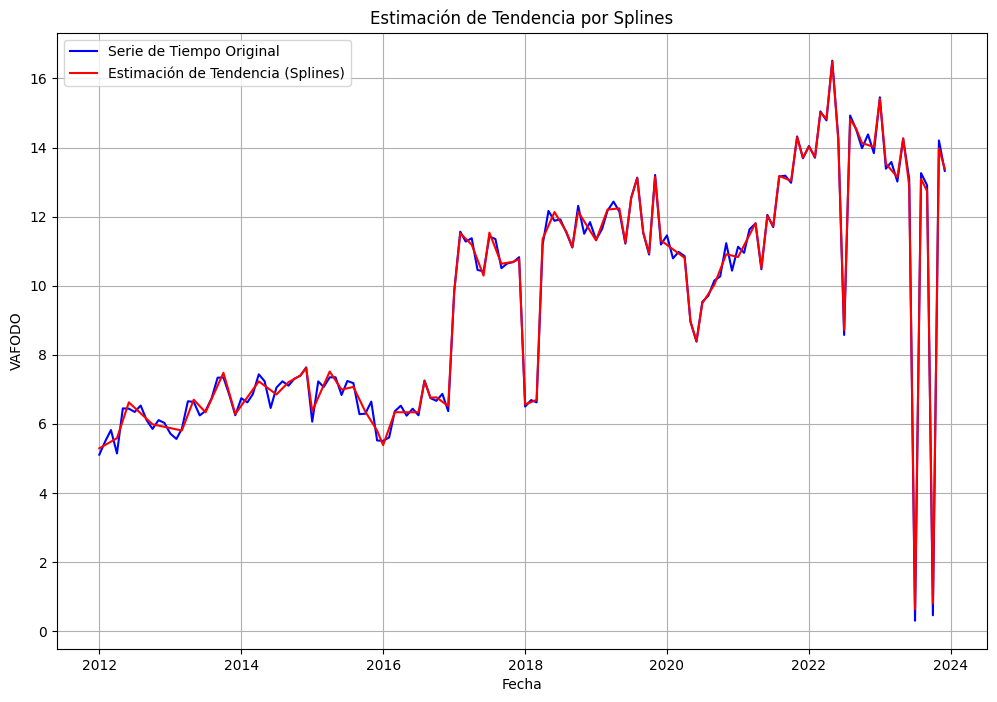

In [18]:
# Convertir la serie de tiempo a un DataFrame de pandas
df_BoxCox = pd.DataFrame({'Fecha': Serie['fecha_completa'], 'BoxCox': serie_boxcox})
df_BoxCox.set_index('Fecha', inplace=True)  # Establecer la columna 'Fecha' como el índice de tiempo

# Ajuste de splines para estimar la tendencia
dates = df_BoxCox.index.to_julian_date()  # Convertir las fechas a días julianos para facilitar el ajuste spline
values = df_BoxCox['BoxCox'].values

# Ajustar un spline cúbico suave
spline = UnivariateSpline(dates, values, k=1, s = 5)  # k=3 para un spline cúbico
trend_spline = spline(dates)  # Valores estimados de la tendencia

# Graficar la serie de tiempo original y la tendencia estimada por splines
plt.figure(figsize=(12, 8))
plt.plot(df_BoxCox.index, df_BoxCox['BoxCox'], label='Serie de Tiempo Original', color='blue')
plt.plot(df_BoxCox.index, trend_spline, label='Estimación de Tendencia (Splines)', color='red')
plt.xlabel('Fecha')
plt.ylabel('VAFODO')
plt.title('Estimación de Tendencia por Splines')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Serie sin tendencia (remover la tendencia estimada por splines)
sin_tendencia_spline = df_BoxCox['BoxCox'] - trend_spline

<h3 style="color: #011f4b;">INDICE DE INFORMAICON MUTUA (AMI) </h3>

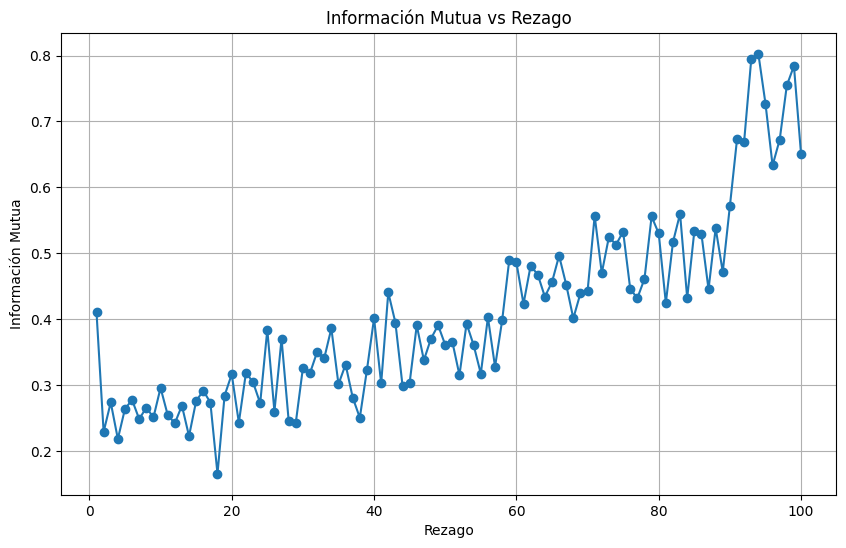

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Función para calcular la información mutua
def mutual_information(x, y, bins=10):
    hist_xy, _, _ = np.histogram2d(x, y, bins=bins, density=True)
    hist_x, _ = np.histogram(x, bins=bins, density=True)
    hist_y, _ = np.histogram(y, bins=bins, density=True)
    
    entropy_xy = entropy(hist_xy.flatten())
    entropy_x = entropy(hist_x)
    entropy_y = entropy(hist_y)
    
    mi = entropy_x + entropy_y - entropy_xy
    return mi

# Calcular la información mutua para diferentes rezagos
lag_values = np.arange(1, 101)
mutual_info_values = [mutual_information(sin_tendencia_spline[:-lag], sin_tendencia_spline[lag:]) for lag in lag_values]

# Graficar la información mutua en función del rezago
plt.figure(figsize=(10, 6))
plt.plot(lag_values, mutual_info_values, marker='o', linestyle='-')
plt.title('Información Mutua vs Rezago')
plt.xlabel('Rezago')
plt.ylabel('Información Mutua')
plt.grid(True)
plt.show()

<h3 style="color: #011f4b;">DETECCION DE ESTACIONALIDAD</h3>

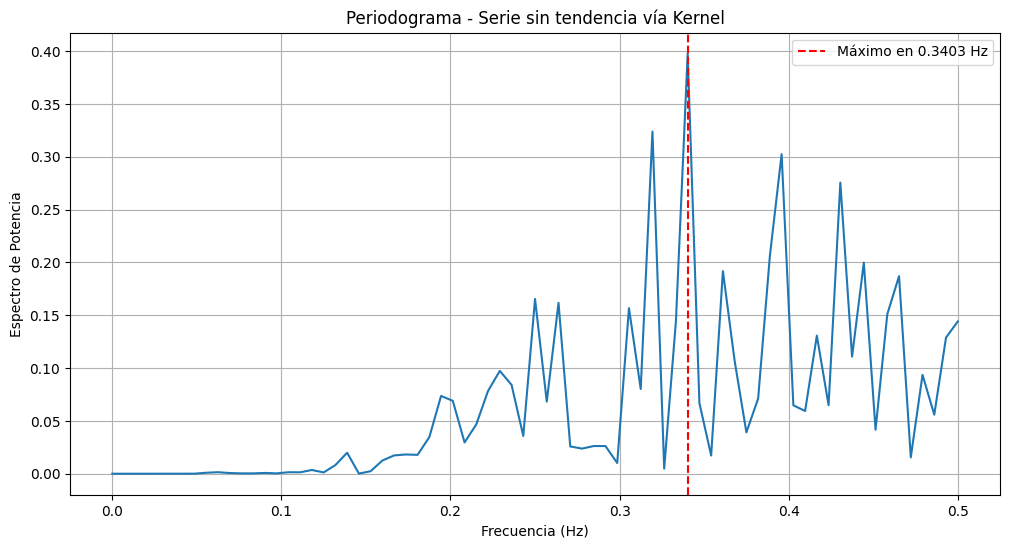

Frecuencia dominante: 0.34
Periodo dominante: 2.94 unidades de tiempo


In [21]:
from scipy.signal import periodogram

# Calcular el periodograma (espectro de potencia) de la serie diferenciada
frequencies, spectrum = periodogram(sin_tendencia_spline)

# Encontrar la frecuencia correspondiente al máximo del espectro
max_frequency = frequencies[np.argmax(spectrum)]
periodo = 1 / max_frequency

# Graficar el periodograma
plt.figure(figsize=(12, 6))
plt.plot(frequencies, spectrum)
plt.axvline(max_frequency, color='red', linestyle='--', label=f'Máximo en {max_frequency:.4f} Hz')
plt.title('Periodograma - Serie sin tendencia vía Kernel')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de Potencia')
plt.legend()
plt.grid(True)
plt.show()

# Calcular el periodo correspondiente a la frecuencia máxima
print(f'Frecuencia dominante: {max_frequency:.2f}')
print(f'Periodo dominante: {periodo:.2f} unidades de tiempo')

<center><h1 style="color: #011f4b;">REDES NEURONALES APLICADAS A SERIES DE TIEMPO</h1></center>

<h2 style="color: #011f4b;">PREPARACION DE LA SERIE</h2>

In [22]:
from __future__ import print_function
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import scipy as sp

In [23]:
STS = sin_tendencia_spline
print(STS.head())
type(STS)

Fecha
2012-01-01   -0.184492
2012-02-01    0.107021
2012-03-01    0.336302
2012-04-01   -0.440628
2012-05-01    0.352852
Name: BoxCox, dtype: float64


pandas.core.series.Series

In [24]:
SerieTs = pd.Series(STS, index = Variables['fecha_completa'])
SerieDf = pd.DataFrame(STS, index = Variables['fecha_completa'])
type(SerieTs)
SerieTs.info()
print(SerieTs)
#type(SerieDf)

<class 'pandas.core.series.Series'>
DatetimeIndex: 144 entries, 2012-01-01 to 2023-12-01
Series name: BoxCox
Non-Null Count  Dtype  
--------------  -----  
144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB
fecha_completa
2012-01-01   -0.184492
2012-02-01    0.107021
2012-03-01    0.336302
2012-04-01   -0.440628
2012-05-01    0.352852
                ...   
2023-08-01    0.169021
2023-09-01    0.165515
2023-10-01   -0.340459
2023-11-01    0.233495
2023-12-01   -0.062102
Name: BoxCox, Length: 144, dtype: float64


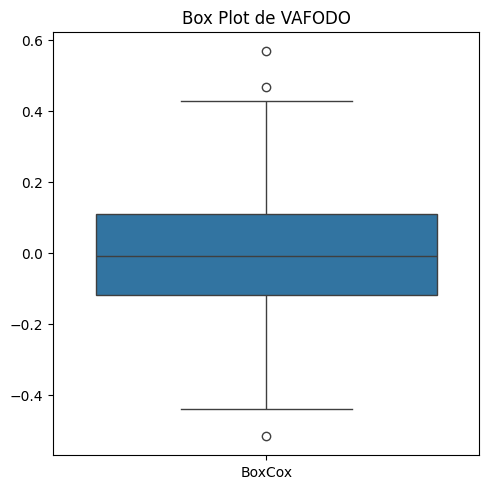

In [30]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(SerieDf) 
g.set_title('Box Plot de VAFODO')
plt.show()

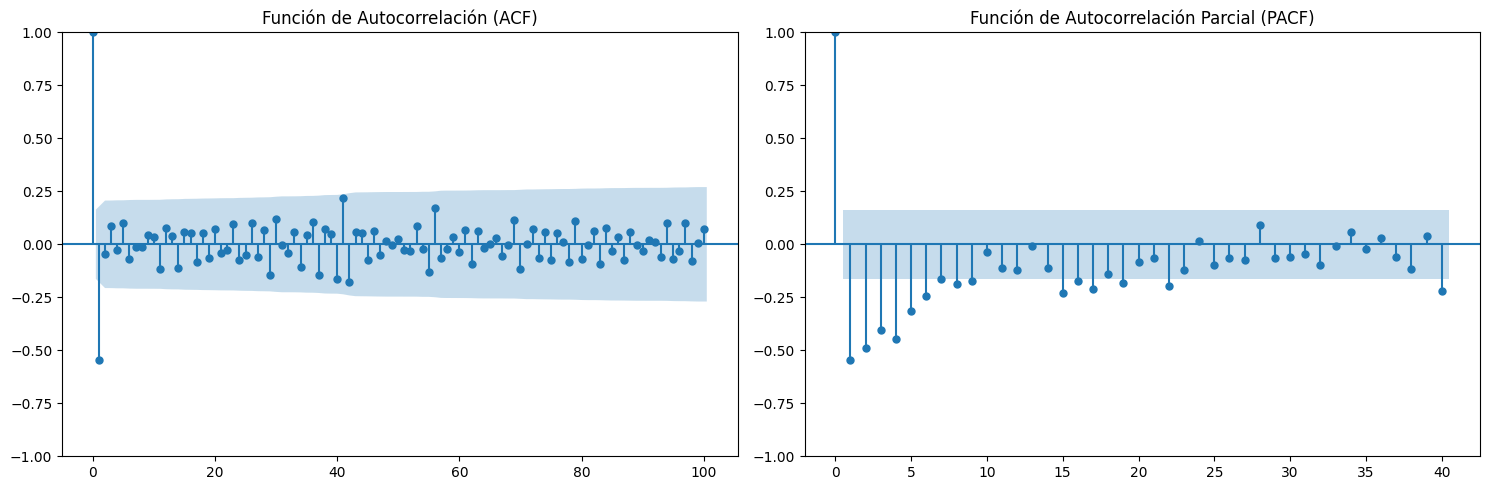

In [38]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Crear una figura con dos subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Graficar ACF
plot_acf(SerieDf, lags=100, ax=ax1)
ax1.set_title('Función de Autocorrelación (ACF)')

# Graficar PACF
plot_pacf(SerieDf, lags=40, method='ldbiased', ax=ax2)
ax2.set_title('Función de Autocorrelación Parcial (PACF)')

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

In [39]:
SerieDf.head(5)

BoxCox
fecha_completa          
2012-01-01     -0.184492
2012-02-01      0.107021
2012-03-01      0.336302
2012-04-01     -0.440628
2012-05-01      0.352852

Frecuencia máxima: 0.34027777777777773
Período correspondiente: 2.938775510204082


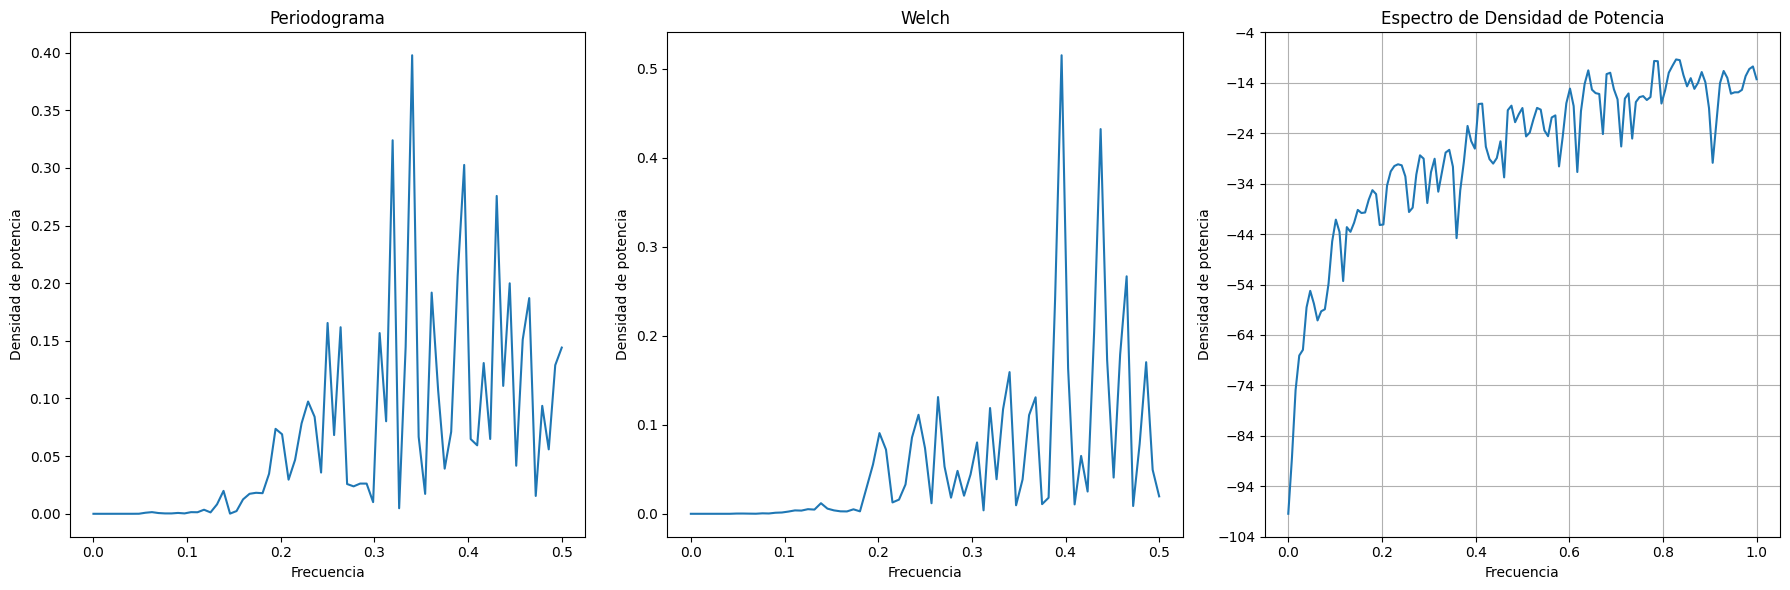

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sp

# Supongamos que 'SerieTs' es tu serie de tiempo, asegúrate de tenerla definida previamente.

# Configurar la figura y los subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 fila, 3 columnas

# Primer subplot: Periodograma
f, Pxx_den = sp.periodogram(sin_tendencia_spline)
max_index_value = np.argmax(Pxx_den, axis=0)
frecuencia_max = f[max_index_value]
print("Frecuencia máxima:", frecuencia_max)
print("Período correspondiente:", 1 / frecuencia_max)
axs[0].plot(f, Pxx_den)
axs[0].set_title('Periodograma')
axs[0].set_xlabel('Frecuencia')
axs[0].set_ylabel('Densidad de potencia')

# Segundo subplot: Welch
f_welch, Pxx_den_welch = sp.welch(sin_tendencia_spline)
axs[1].plot(f_welch, Pxx_den_welch)
axs[1].set_title('Welch')
axs[1].set_xlabel('Frecuencia')
axs[1].set_ylabel('Densidad de potencia')

# Tercer subplot: Espectro de densidad de potencia
axs[2].psd(sin_tendencia_spline)
axs[2].set_title('Espectro de Densidad de Potencia')
axs[2].set_xlabel('Frecuencia')
axs[2].set_ylabel('Densidad de potencia')

# Ajustar automáticamente el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

1. Periodograma:
   - El eje X representa la frecuencia y el eje Y la densidad de potencia.
   - Los picos en el gráfico indican las frecuencias dominantes en la serie temporal.
   - La frecuencia con la mayor amplitud (el pico más alto) es la frecuencia dominante en la serie.

2. Método de Welch:
   - Similar al periodograma, pero suele proporcionar una estimación más suave y menos ruidosa del espectro de potencia.
   - Los ejes son los mismos que en el periodograma.
   - Los picos siguen indicando las frecuencias dominantes, pero pueden ser menos pronunciados y más suaves que en el periodograma.

3. Espectro de Densidad de Potencia (PSD):
   - Este gráfico muestra cómo la potencia de la señal se distribuye en función de la frecuencia.
   - El eje X es la frecuencia y el eje Y es la densidad de potencia en escala logarítmica (dB/Hz).
   - Los picos en este gráfico también indican las frecuencias dominantes en tu serie temporal.

Interpretación general:
- Busca picos prominentes en los tres gráficos. Si ves picos consistentes en las mismas frecuencias en los tres métodos, es una fuerte indicación de que esas frecuencias son significativas en tu serie temporal.
- La altura de los picos indica la importancia relativa de cada frecuencia.
- Las frecuencias bajas (cerca de cero) a menudo representan tendencias a largo plazo, mientras que las frecuencias más altas representan variaciones más rápidas o estacionalidad de corto plazo.
- Si ves múltiples picos equidistantes, podría indicar la presencia de armónicos, que son múltiplos enteros de una frecuencia fundamental.
- La ausencia de picos claros y un espectro relativamente plano podría sugerir que la serie temporal se asemeja más a un ruido aleatorio.


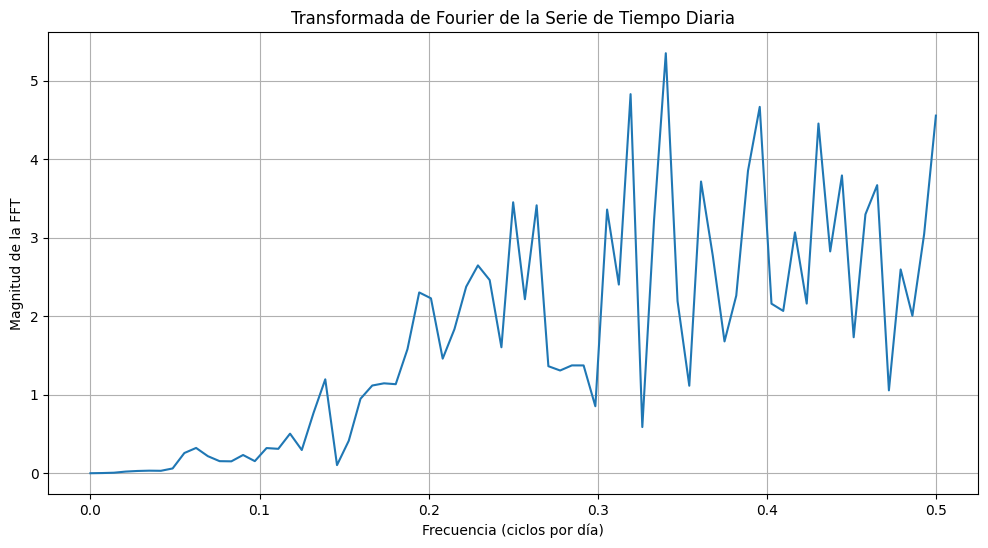

In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que 'SerieTs' es tu serie de tiempo diaria, asegúrate de tenerla definida previamente.

# Aplicar la transformada de Fourier discreta en la serie de tiempo diaria
fft = tf.signal.rfft(sin_tendencia_spline)
frequencies = np.fft.rfftfreq(len(sin_tendencia_spline), d=1)  # Frecuencias correspondientes

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.abs(fft))
plt.xlabel('Frecuencia (ciclos por día)')
plt.ylabel('Magnitud de la FFT')
plt.title('Transformada de Fourier de la Serie de Tiempo Diaria')
plt.grid(True)
plt.show()


In [44]:
# Obtener el índice de la serie de tiempo como un objeto DatetimeIndex
date_time_index = STS.index
date_time_index = pd.Series(date_time_index)
type(date_time_index)

# Convertir cada valor de fecha y hora a un timestamp en segundos
timestamp_s = date_time_index.apply(pd.Timestamp.timestamp)

# Mostrar el resultado (opcional)
print(timestamp_s)

0      1.325376e+09
1      1.328054e+09
2      1.330560e+09
3      1.333238e+09
4      1.335830e+09
           ...     
139    1.690848e+09
140    1.693526e+09
141    1.696118e+09
142    1.698797e+09
143    1.701389e+09
Name: Fecha, Length: 144, dtype: float64


In [49]:
df = pd.DataFrame()
day = 24*60*60
year = (365.2425)*day

df['VAFODO'] = STS.values
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

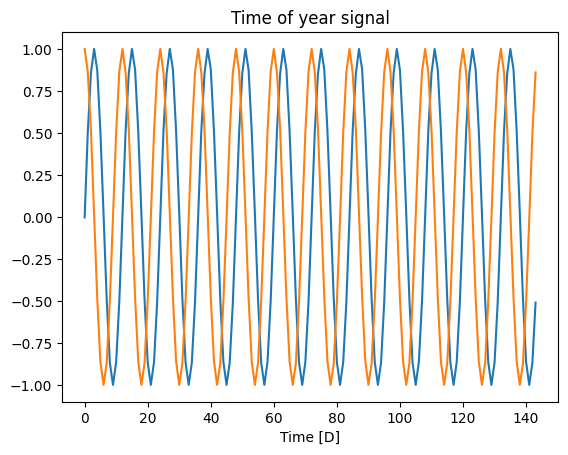

In [50]:
plt.plot(np.array(df['Year sin'])[:365])
plt.plot(np.array(df['Year cos'])[:365])
plt.xlabel('Time [D]')
plt.title('Time of year signal')
plt.show()

In [52]:
df['Fecha'] = STS.index
df.columns
df.head(5)

VAFODO  Year sin  Year cos      Fecha
0 -0.184492 -0.003183  0.999995 2012-01-01
1  0.107021  0.505623  0.862755 2012-02-01
2  0.336302  0.856776  0.515689 2012-03-01
3 -0.440628  0.999964  0.008526 2012-04-01
4  0.352852  0.873934 -0.486044 2012-05-01

In [53]:
df1 = df.set_index('Fecha')
df1

VAFODO  Year sin  Year cos
Fecha                                   
2012-01-01 -0.184492 -0.003183  0.999995
2012-02-01  0.107021  0.505623  0.862755
2012-03-01  0.336302  0.856776  0.515689
2012-04-01 -0.440628  0.999964  0.008526
2012-05-01  0.352852  0.873934 -0.486044
...              ...       ...       ...
2023-08-01  0.169021 -0.486373 -0.873751
2023-09-01  0.165515 -0.863021 -0.505168
2023-10-01 -0.340459 -0.999909 -0.013493
2023-11-01  0.233495 -0.867922  0.496700
2023-12-01 -0.062102 -0.509773  0.860309

[144 rows x 3 columns]

<h2 style="color: #011f4b;">DIVISION ENTRENAMIENTO, VALIDACION Y PRUEBA</h2>

In [54]:
column_indices = {name: i for i, name in enumerate(df1.columns)}

n = len(df1)
train_df1 = df1[0:int(n*0.7)]
val_df1 = df1[int(n*0.7):int(n*0.9)]
test_df1 = df1[int(n*0.9):]

num_features = df1.shape[1]
num_features

3

In [55]:
train_df1

VAFODO  Year sin  Year cos
Fecha                                   
2012-01-01 -0.184492 -0.003183  0.999995
2012-02-01  0.107021  0.505623  0.862755
2012-03-01  0.336302  0.856776  0.515689
2012-04-01 -0.440628  0.999964  0.008526
2012-05-01  0.352852  0.873934 -0.486044
...              ...       ...       ...
2019-12-01 -0.117771 -0.510216  0.860046
2020-01-01  0.274925 -0.002150  0.999998
2020-02-01 -0.261813  0.506513  0.862232
2020-03-01  0.043447  0.857307  0.514805
2020-04-01  0.048644  0.999972  0.007494

[100 rows x 3 columns]

In [56]:
val_df1

VAFODO  Year sin  Year cos
Fecha                                   
2020-05-01 -0.012226  0.873432 -0.486946
2020-06-01 -0.013323  0.504602 -0.863352
2020-07-01  0.039410  0.012837 -0.999918
2020-08-01 -0.051023 -0.497269 -0.867596
2020-09-01  0.120693 -0.869275 -0.494328
2020-10-01 -0.194687 -1.000000 -0.000978
2020-11-01  0.320590 -0.861638  0.507523
2020-12-01 -0.435749 -0.498966  0.866622
2021-01-01  0.296284  0.010881  0.999941
2021-02-01 -0.216234  0.517705  0.855559
2021-03-01  0.159025  0.855152  0.518377
2021-04-01 -0.006391  0.999932  0.011665
2021-05-01 -0.040475  0.875456 -0.483298
2021-06-01  0.036150  0.508199 -0.861240
2021-07-01 -0.030250  0.017008 -0.999855
2021-08-01 -0.017308 -0.493646 -0.869663
2021-09-01  0.077064 -0.867206 -0.497950
2021-10-01 -0.059400 -0.999987 -0.005150
2021-11-01  0.026500 -0.863748  0.503924
2021-12-01 -0.019317 -0.502577  0.864532
2022-01-01  0.016923  0.006709  0.999977
2022-02-01 -0.026250  0.514132  0.857711
2022-03-01  0.031352  0.852982  0.521940
2022-04-01 -0.041823  0.999875  0.015837
2022-05-01  0.029148  0.877465 -0.479641
2022-06-01  0.065711  0.511788 -0.859112
2022-07-01 -0.147462  0.021179 -0.999776
2022-08-01  0.106265 -0.490013 -0.871715
2022-09-01 -0.024756 -0.865121 -0.501563

In [57]:
test_df1

VAFODO  Year sin  Year cos
Fecha                                   
2022-10-01 -0.151257 -0.999957 -0.009322
2022-11-01  0.307616 -0.865843  0.500317
2022-12-01 -0.179360 -0.506179  0.862428
2023-01-01  0.042220  0.002537  0.999997
2023-02-01 -0.145414  0.510549  0.859848
2023-03-01  0.234330  0.850798  0.525494
2023-04-01 -0.128154  0.999800  0.020008
2023-05-01 -0.020475  0.879458 -0.475977
2023-06-01  0.202248  0.515367 -0.856970
2023-07-01 -0.329596  0.025350 -0.999679
2023-08-01  0.169021 -0.486373 -0.873751
2023-09-01  0.165515 -0.863021 -0.505168
2023-10-01 -0.340459 -0.999909 -0.013493
2023-11-01  0.233495 -0.867922  0.496700
2023-12-01 -0.062102 -0.509773  0.860309

In [58]:
#Normalizacion de las variables 

train_mean = train_df1.mean()
train_std = train_df1.std()

train_df = (train_df1 - train_mean) / train_std
val_df = (val_df1 - train_mean) / train_std
test_df = (test_df1 - train_mean) / train_std

In [60]:
#Creacion de las variables rezagadas

# Crear un DataFrame vacío para almacenar los rezagos
df2 = pd.DataFrame()

# Generar los primeros 7 rezagos consecutivos
num_lags_consecutivos = 3
for i in range(num_lags_consecutivos, 0, -1):
    df2[f't-{i}'] = STS.shift(i)

# Generar rezagos que son múltiplos de 7 hasta 70
num_lags_multiples_7 = 24
for i in range(3, num_lags_multiples_7 + 1, 3):
    df2[f't-{i}'] = STS.shift(i)

# Mostrar el DataFrame resultante
print(df2)

                 t-3       t-2       t-1       t-6       t-9      t-12  \
Fecha                                                                    
2012-01-01       NaN       NaN       NaN       NaN       NaN       NaN   
2012-02-01       NaN       NaN -0.184492       NaN       NaN       NaN   
2012-03-01       NaN -0.184492  0.107021       NaN       NaN       NaN   
2012-04-01 -0.184492  0.107021  0.336302       NaN       NaN       NaN   
2012-05-01  0.107021  0.336302 -0.440628       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2023-08-01 -0.020475  0.202248 -0.329596 -0.145414  0.307616  0.106265   
2023-09-01  0.202248 -0.329596  0.169021  0.234330 -0.179360 -0.024756   
2023-10-01 -0.329596  0.169021  0.165515 -0.128154  0.042220 -0.151257   
2023-11-01  0.169021  0.165515 -0.340459 -0.020475 -0.145414  0.307616   
2023-12-01  0.165515 -0.340459  0.233495  0.202248  0.234330 -0.179360   

                t-15      t-18      t

In [61]:
df2['t'] = df1['VAFODO']
print(df2.head(8))

                 t-3       t-2       t-1       t-6  t-9  t-12  t-15  t-18  \
Fecha                                                                       
2012-01-01       NaN       NaN       NaN       NaN  NaN   NaN   NaN   NaN   
2012-02-01       NaN       NaN -0.184492       NaN  NaN   NaN   NaN   NaN   
2012-03-01       NaN -0.184492  0.107021       NaN  NaN   NaN   NaN   NaN   
2012-04-01 -0.184492  0.107021  0.336302       NaN  NaN   NaN   NaN   NaN   
2012-05-01  0.107021  0.336302 -0.440628       NaN  NaN   NaN   NaN   NaN   
2012-06-01  0.336302 -0.440628  0.352852       NaN  NaN   NaN   NaN   NaN   
2012-07-01 -0.440628  0.352852 -0.181926 -0.184492  NaN   NaN   NaN   NaN   
2012-08-01  0.352852 -0.181926 -0.120903  0.107021  NaN   NaN   NaN   NaN   

            t-21  t-24         t  
Fecha                             
2012-01-01   NaN   NaN -0.184492  
2012-02-01   NaN   NaN  0.107021  
2012-03-01   NaN   NaN  0.336302  
2012-04-01   NaN   NaN -0.440628  
2012-05-01   NaN   

In [62]:
# Create a new subsetted dataframe, removing Nans from first 7 rows
df3 = df2.dropna()
print(df3.head(7))
df3.shape

                 t-3       t-2       t-1       t-6       t-9      t-12  \
Fecha                                                                    
2014-01-01 -0.133034 -0.047328 -0.035934  0.043254  0.392747 -0.161444   
2014-02-01 -0.047328 -0.035934  0.215537  0.020370 -0.061695 -0.277339   
2014-03-01 -0.035934  0.215537 -0.148338  0.231219 -0.269849  0.049968   
2014-04-01  0.215537 -0.148338 -0.130530 -0.133034  0.043254  0.392747   
2014-05-01 -0.148338 -0.130530  0.204268 -0.047328  0.020370 -0.061695   
2014-06-01 -0.130530  0.204268  0.128602 -0.035934  0.231219 -0.269849   
2014-07-01  0.204268  0.128602 -0.516356  0.215537 -0.133034  0.043254   

                t-15      t-18      t-21      t-24         t  
Fecha                                                         
2014-01-01 -0.132340 -0.120903 -0.440628 -0.184492  0.215537  
2014-02-01  0.158396  0.225629  0.352852  0.107021 -0.148338  
2014-03-01  0.113385 -0.040141 -0.181926  0.336302 -0.130530  
2014-04-01 -0.1614

(120, 11)

In [63]:
#DIVIDIR DATOS
DFsplit = df3.values

X1= DFsplit[:, 0:-1]  
y1 =DFsplit[:,-1]  

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [66]:
X_train_full, X_test, y_train_full, y_test=train_test_split(X1,y1,test_size=0.1, train_size=0.9,shuffle=False)

In [67]:
print(X_train_full.shape)
print(X_test.shape)

print(y_train_full.shape)
print(y_test.shape)

(108, 10)
(12, 10)
(108,)
(12,)


In [68]:
X_train, X_val, y_train, y_val=train_test_split(X_train_full,y_train_full,test_size=0.2, train_size=0.8,shuffle=False)

In [69]:
print(X_train.shape)
print(X_val.shape)

print(y_train.shape)
print(y_val.shape)

(86, 10)
(22, 10)
(86,)
(22,)


### NORMALIZACION DE LA COVARIABLES - UTILIZANDO MIN MAX SCALES

In [70]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

<h2 style="color: #011f4b;">REDES NEURONALES DE UNA CAPA</h2>

In [71]:
import tensorflow.keras as keras

In [72]:
model=keras.models.Sequential([keras.layers.Dense(64,activation="relu",input_shape=X_train.shape[1:]),keras.layers.Dense(1)])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
model.compile(loss="mean_squared_error",optimizer="adam")
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0540 - val_loss: 0.0204
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0389 - val_loss: 0.0262
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0474 - val_loss: 0.0229
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0419 - val_loss: 0.0188
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0370 - val_loss: 0.0177
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0380 - val_loss: 0.0171
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0389 - val_loss: 0.0161
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0316 - val_loss: 0.0167
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0363 - val_loss: 0.0172
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0358 - val_loss: 0.0158
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0350 - val_loss: 0.0144
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0293 - val_loss: 0.0135
E

Index(['loss', 'val_loss'], dtype='object')


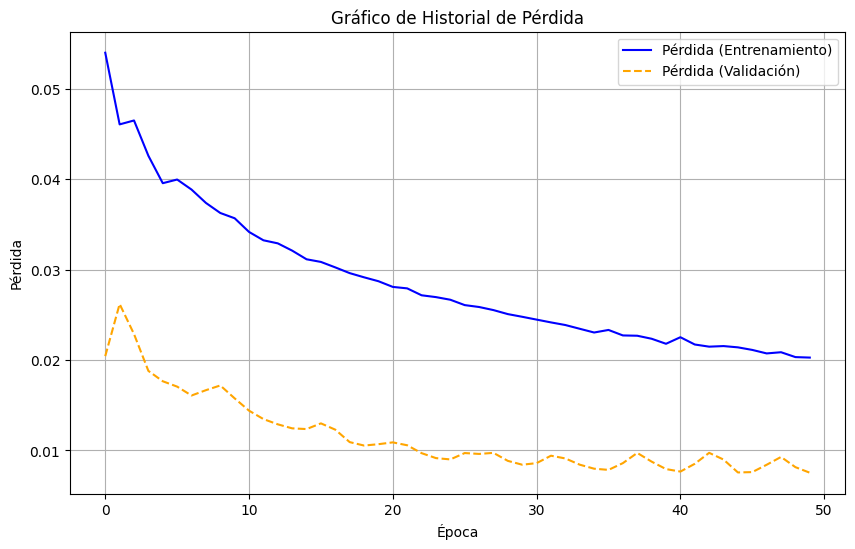

In [74]:
import matplotlib.pyplot as plt

# Crear un DataFrame a partir del historial
df_history = pd.DataFrame(history.history)

# Verificar las métricas disponibles en el historial
print(df_history.keys())

# Graficar las métricas de pérdida (loss) y precisión (accuracy), si están disponibles
if 'loss' in df_history:
    plt.figure(figsize=(10, 6))
    plt.plot(df_history['loss'], label='Pérdida (Entrenamiento)', color='blue', linestyle='-')
    if 'val_loss' in df_history:
        plt.plot(df_history['val_loss'], label='Pérdida (Validación)', color='orange', linestyle='--')
    plt.title('Gráfico de Historial de Pérdida')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No se encontraron métricas de pérdida (loss) en el historial.")

A pesar de que en ambas curvas podemos observar un tendencia a la disminucion de la perdidad tambien podemos observar que la curva de perdidad en el conjunto de validacion es inusualmente oscilante, lo cual no sabemos que puede significar **Preguntar al profe**

In [75]:
mse_test=model.evaluate(X_test,y_test)
print(mse_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.0174
0.01735829748213291


In [76]:
ypred=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


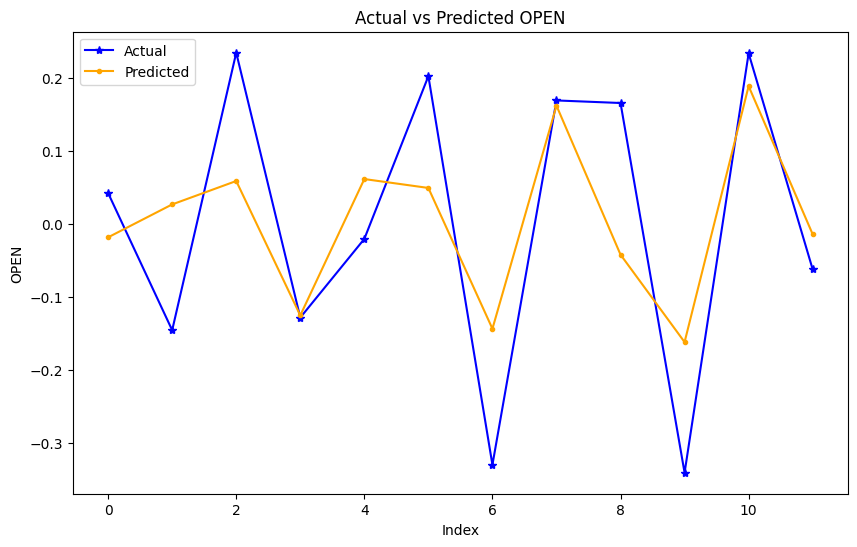

In [87]:
import matplotlib.pyplot as plt

# Definir el tamaño y los subplots de la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar valores reales (y_test) y valores predichos (ypred)
ax.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='blue', label='Actual')
ax.plot(range(ypred.size), ypred, linestyle='-', marker='.', color='orange', label='Predicted')

# Agregar título y etiquetas de ejes
ax.set_title('Actual vs Predicted OPEN')
ax.set_xlabel('Index')
ax.set_ylabel('OPEN')

# Agregar leyenda
ax.legend()

# Mostrar la gráfica mejorada
plt.show()

<h2 style="color: #011f4b;">REDES NEURONALES MULTICAPA</h2>

In [88]:
input_layer = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(32,activation="linear")(input_layer)
hidden2 = keras.layers.Dense(16,activation="linear")(hidden1)
hidden3 = keras.layers.Dense(16,activation="linear")(hidden2)
output_layer = keras.layers.Dense(1, activation='linear')(hidden3)

In [89]:
ts_model=keras.Model(inputs=[input_layer],outputs=[output_layer])
ts_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │             352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
print("Input shape:", X_train.shape)
print("Target shape:", y_train.shape)

Input shape: (86, 10)
Target shape: (86,)


In [91]:
ts_model.compile(loss="mean_squared_error",optimizer="adam")
history=ts_model.fit(X_train,y_train,epochs=50,batch_size=16,validation_data=(X_val,y_val))

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.4079 - val_loss: 0.0423
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0801 - val_loss: 0.0782
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1153 - val_loss: 0.0538
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0680 - val_loss: 0.0254
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0605 - val_loss: 0.0315
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0590 - val_loss: 0.0265
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0464 - val_loss: 0.0206
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0380 - val_loss: 0.0226
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0499 - val_loss: 0.0196
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0383 - val_loss: 0.0168
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0455 - val_loss: 0.0156
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0413 - val_loss: 0.0148
Epo

Index(['loss', 'val_loss'], dtype='object')


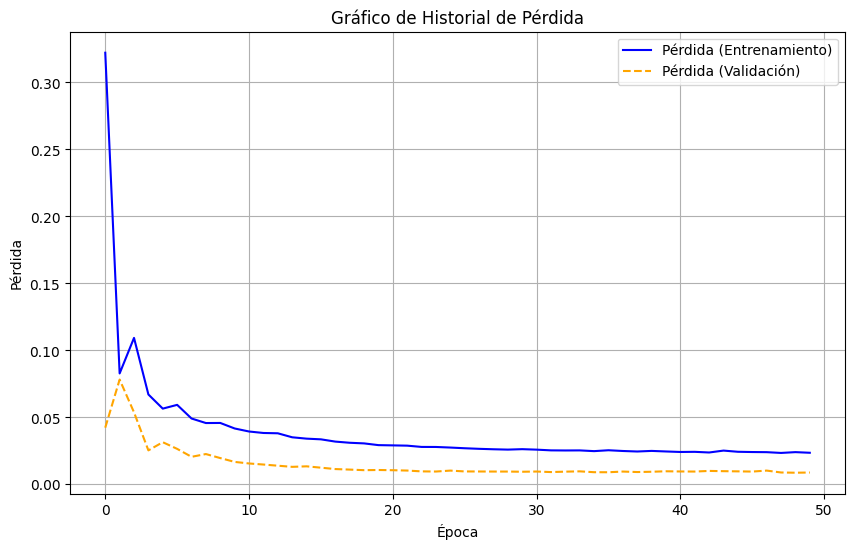

In [92]:
import matplotlib.pyplot as plt

# Crear un DataFrame a partir del historial
df_history = pd.DataFrame(history.history)

# Verificar las métricas disponibles en el historial
print(df_history.keys())

# Graficar las métricas de pérdida (loss) y precisión (accuracy), si están disponibles
if 'loss' in df_history:
    plt.figure(figsize=(10, 6))
    plt.plot(df_history['loss'], label='Pérdida (Entrenamiento)', color='blue', linestyle='-')
    if 'val_loss' in df_history:
        plt.plot(df_history['val_loss'], label='Pérdida (Validación)', color='orange', linestyle='--')
    plt.title('Gráfico de Historial de Pérdida')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No se encontraron métricas de pérdida (loss) en el historial.")

Usando Redes Neuronales Multicapa se puede ver como ambas curvas presentan un comportamiento similar a partir de pocas epocas, y ademas de presentar la misma tendencia, ninguna de las curvar presenta un comportamiento oscilante.

In [93]:
mse_test=ts_model.evaluate(X_test,y_test)
print(mse_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0165
0.01654651388525963


In [94]:
preds_ts_model=ts_model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [ ]:
## HACER LA GRAFICA DEL MODELO PARA LOS DATOS COMPLETOS

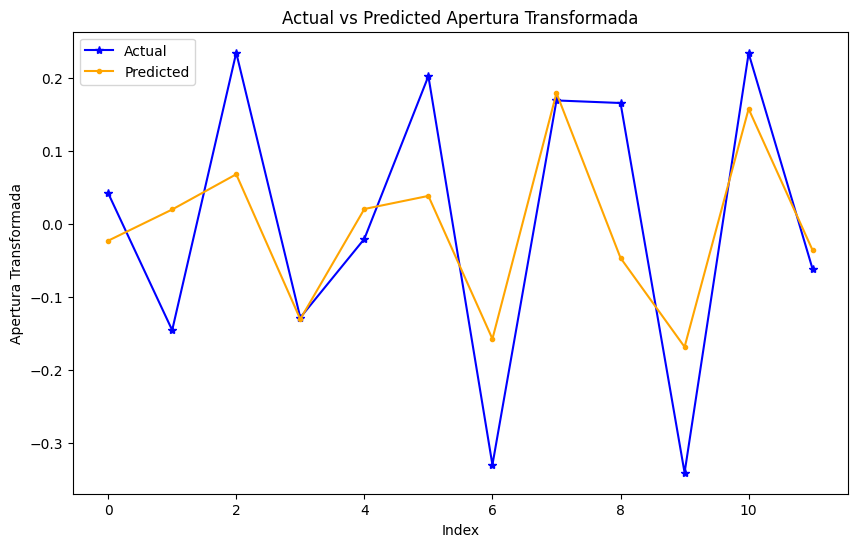

In [95]:
import matplotlib.pyplot as plt

# Definir el tamaño y los subplots de la figura
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar valores reales (y_test) y valores predichos (preds_ts_model)
ax.plot(range(y_test.size), y_test, linestyle='-', marker='*', color='blue', label='Actual')
ax.plot(range(preds_ts_model.size), preds_ts_model, linestyle='-', marker='.', color='orange', label='Predicted')

# Agregar título y etiquetas de ejes
ax.set_title('Actual vs Predicted Apertura Transformada')
ax.set_xlabel('Index')
ax.set_ylabel('Apertura Transformada')

# Agregar leyenda
ax.legend()

# Mostrar la gráfica mejorada
plt.show()

<h2 style="color: #011f4b;">BUSQUEDA DE HIPERPARAMETROS</h2>

In [96]:
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras import layers

In [97]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(units=hp.Int("num_units", min_value=32, max_value=64, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"])))
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 1, 2)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=32, max_value=64, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.25))
    model.add(layers.Dense(1, activation="linear"))
    learning_rate = hp.Float("lr", min_value=1e-3, max_value=1e-2,step=0.003)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mean_squared_error",
        metrics=["mean_squared_error"]
    )
    return model


build_model(kt.HyperParameters())

<Sequential name=sequential_1, built=False>

In [98]:
tuner_GridSearch_mlp = kt.GridSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=None,
    executions_per_trial=1,
    overwrite=True,
    directory="dirsalida",
    project_name="helloworld",
)

In [99]:
tuner_GridSearch_mlp.search_space_summary()

Search space summary
Default search space size: 6
num_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 32, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 32, 'sampling': 'linear'}
dropout (Boolean)
{'default': False, 'conditions': []}
lr (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.01, 'step': 0.003, 'sampling': 'linear'}


In [100]:
stop_early=tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=2)

In [101]:
tuner_GridSearch_mlp.search(X_train,y_train, epochs=20, validation_data=(X_val,y_val),callbacks=[stop_early])

Trial 240 Complete [00h 00m 06s]
val_loss: 0.012469977140426636

Best val_loss So Far: 0.006244177930057049
Total elapsed time: 00h 19m 18s


In [102]:
tuner_GridSearch_mlp.results_summary()

Results summary
Results in dirsalida\helloworld
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0060 summary
Hyperparameters:
num_units: 32
activation: tanh
num_layers: 1
units_0: 32
dropout: True
lr: 0.007
units_1: 32
Score: 0.006244177930057049

Trial 0032 summary
Hyperparameters:
num_units: 32
activation: relu
num_layers: 2
units_0: 64
dropout: False
lr: 0.001
units_1: 32
Score: 0.006260564550757408

Trial 0192 summary
Hyperparameters:
num_units: 64
activation: tanh
num_layers: 1
units_0: 64
dropout: False
lr: 0.001
units_1: 32
Score: 0.006301934830844402

Trial 0217 summary
Hyperparameters:
num_units: 64
activation: tanh
num_layers: 2
units_0: 32
dropout: True
lr: 0.001
units_1: 64
Score: 0.0064923884347081184

Trial 0124 summary
Hyperparameters:
num_units: 64
activation: relu
num_layers: 1
units_0: 32
dropout: True
lr: 0.007
units_1: 32
Score: 0.006633879151195288

Trial 0094 summary
Hyperparameters:
num_units: 32
activation: tanh
num_layers: 2
units_0: 3

<h2 style="color: #011f4b;">AJUSTE DEL MEJOR MODELO</h2>

In [103]:
x_all = np.concatenate((X_train, X_val))
y_all = np.concatenate((y_train, y_val))

In [104]:
callback=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5)
best_hps_mlp = tuner_GridSearch_mlp.get_best_hyperparameters(2)
model_mlp = build_model(best_hps_mlp[0])
model_mlp.fit(x_all,y_all, epochs=50,callbacks=[callback])

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1002 - mean_squared_error: 0.1002
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0792 - mean_squared_error: 0.0792 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0664 - mean_squared_error: 0.0664 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0464 - mean_squared_error: 0.0464 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0368 - mean_squared_error: 0.0368 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0352 - mean_squared_error: 0.0352 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0274 - mean_squared_error: 0.0274 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0363 - mean_squared_error: 0.0363 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0293 - mean_squared_error: 0.0293 
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0269 - mean_squared_error: 0.0269 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0313 - mea

In [105]:
model_mlp.layers[0].get_weights()[0]

array([[-0.15095809,  0.20001666,  0.3007578 , -0.13121086, -0.31207412,
         0.00185723,  0.24665833,  0.22933015,  0.11014105, -0.07309569,
         0.0926317 ,  0.17205709,  0.20608707,  0.27308628,  0.06966268,
         0.23907435,  0.05753055,  0.21425387, -0.13736536,  0.08113011,
         0.24833979,  0.30252326,  0.0612711 , -0.3364436 ,  0.08647759,
         0.18333593,  0.29347402, -0.19357349, -0.22845136, -0.14580955,
        -0.03726181,  0.04177629],
       [ 0.06818902,  0.24597141, -0.09713513,  0.3030726 ,  0.05974922,
        -0.34589663, -0.33459726, -0.2875955 ,  0.05262516,  0.28374103,
        -0.1753265 ,  0.21589702, -0.27739587, -0.08702733, -0.3447588 ,
        -0.05863032, -0.10086022,  0.08792235, -0.26207972, -0.08014409,
        -0.35585025, -0.1870218 , -0.12146159,  0.10534648, -0.39503014,
         0.10674063, -0.05817251,  0.18091859,  0.1781484 , -0.17314738,
        -0.1122386 , -0.264332  ],
       [ 0.08480758,  0.06777472,  0.23133221,  0.2015

In [106]:
print(model_mlp.layers[0].bias.numpy())

[-0.06321038 -0.09043414 -0.03237854 -0.04901438  0.03637632 -0.00020139
 -0.00765608 -0.04771591 -0.02193414 -0.05995064 -0.02930783  0.02134661
  0.08075356 -0.02265028 -0.02011513  0.01451884 -0.00299843 -0.01681603
  0.0088689   0.09928493 -0.01004401 -0.04191288  0.03498737  0.0121335
 -0.01918527 -0.00528463  0.00847592  0.02848048 -0.02629845  0.04105879
  0.07961563  0.02241718]


In [113]:
mse_test=model_mlp.evaluate(X_test,y_test)
print(mse_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - loss: 0.0160 - mean_squared_error: 0.0160
[0.015960311517119408, 0.015960311517119408]


In [107]:
X_test.shape
prediction_test=model_mlp.predict( X_test, verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


In [108]:
y_test=y_test.reshape((y_test.shape[0], 1))

In [109]:
prediction_test.shape

(12, 1)

In [110]:
y_test.shape

(12, 1)

In [111]:
from sklearn.metrics import mean_squared_error

errors_squared = mean_squared_error(y_test, prediction_test, squared=True)
rmse = errors_squared**0.5
print("RECM:", rmse)

RECM: 0.12633412302818484


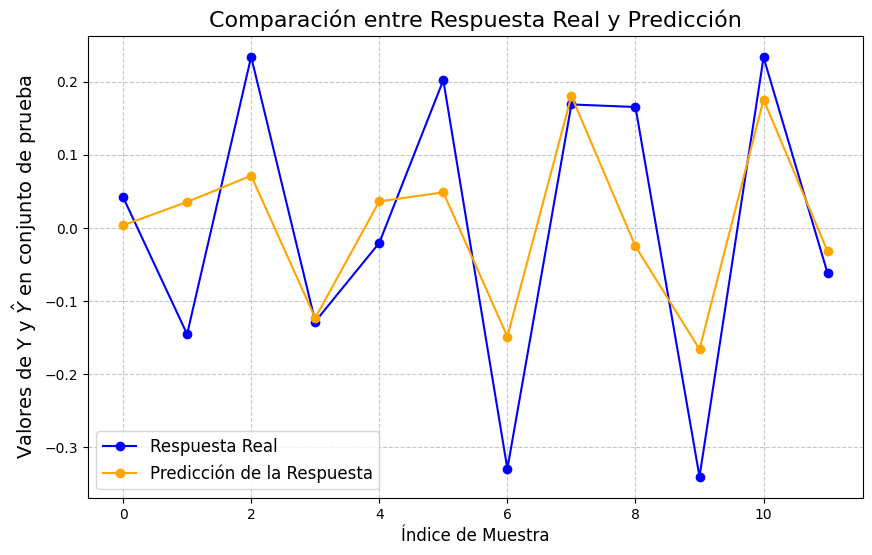

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Tamaño de la figura

# Gráfica de los datos reales y las predicciones
plt.plot(y_test, label='Respuesta Real', marker='o', color = 'blue')  # Datos reales
plt.plot(prediction_test, label='Predicción de la Respuesta', linestyle='-', marker='o', color = 'orange')  # Predicciones

# Leyenda y etiquetas
plt.legend(fontsize=12)  # Leyenda con tamaño de fuente
plt.ylabel('Valores de Y y $\hat{Y}$ en conjunto de prueba', fontsize=14)  # Etiqueta del eje y

# Añadir título y ajustes adicionales
plt.title('Comparación entre Respuesta Real y Predicción', fontsize=16)  # Título de la gráfica
plt.xlabel('Índice de Muestra', fontsize=12)  # Etiqueta del eje x
plt.grid(True, linestyle='--', alpha=0.7)  # Cuadrícula punteada

plt.show()  # Mostrar la gráfica

Podemos observar que aplicando la busqueda de hiperparametros para la Red Neuronal Multicapa no hay un cambio notable en las predicciones qye se hacen sobre el conjunto de prueba, el cambio en el MSE es muy pequeño, lo cual corrobora lo que vemos en las graficas. 

<h2 style="color: #011f4b;">REDES NEURONALES RECURRENTE RNN</h2>

In [25]:
Serie = STS
STS.info

<bound method Series.info of Fecha
2012-01-01   -0.184492
2012-02-01    0.107021
2012-03-01    0.336302
2012-04-01   -0.440628
2012-05-01    0.352852
                ...   
2023-08-01    0.169021
2023-09-01    0.165515
2023-10-01   -0.340459
2023-11-01    0.233495
2023-12-01   -0.062102
Name: BoxCox, Length: 144, dtype: float64>

In [26]:
df = pd.DataFrame(STS.values, index=STS.index, columns=['VAFODO'])
df

VAFODO
Fecha               
2012-01-01 -0.184492
2012-02-01  0.107021
2012-03-01  0.336302
2012-04-01 -0.440628
2012-05-01  0.352852
...              ...
2023-08-01  0.169021
2023-09-01  0.165515
2023-10-01 -0.340459
2023-11-01  0.233495
2023-12-01 -0.062102

[144 rows x 1 columns]

In [27]:
nof_missing_values = sum(np.isnan(df['VAFODO']))

print(nof_missing_values, 'observations are missing.')
print('This is {:.3f}% of the total.'.format(nof_missing_values*100/len(df)))

0 observations are missing.
This is 0.000% of the total.


In [28]:
use_features =['VAFODO']  # continuous input
target = ['VAFODO'] # continuous output
n_steps_ahead = 1 # forecasting horizon

In [29]:
adf, p, usedlag, nobs, cvs, aic = sm.tsa.stattools.adfuller(df['VAFODO'])
adf_results_string = 'ADF: {}\np-value: {},\nN: {}, \ncritical values: {}'
print(adf_results_string.format(adf, p, nobs, cvs))

ADF: -6.050994014083185
p-value: 1.2777236623438134e-07,
N: 129, 
critical values: {'1%': -3.482087964046026, '5%': -2.8842185101614626, '10%': -2.578864381347275}


<h2 style="color: #011f4b;">CONJUNTO DE ENTRENAMIENTO Y DE PRUEBA</h2>

In [30]:
train_weight = 0.8
split = int(len(df) * train_weight)

df_train = df[use_features].iloc[:split]
df_test = df[use_features].iloc[split:]

In [32]:
## ESCALADO 
mu = float(df_train.mean())
sigma = float(df_train.std())

stdize_input = lambda x: (x - mu) / sigma

df_train = df_train.apply(stdize_input)
df_test = df_test.apply(stdize_input)

In [39]:
def get_lagged_features(df, n_steps_ahead):
    """
    df: pandas DataFrame of time series to be lagged
    n_steps_ahead: forecasting horizon
    """
    lag_list = []
    
    # Agregar los primeros 3 rezagos
    for lag in range(3, 0, -1):
        lag_list.append(df.shift(lag))
        
    # Agregar rezagos que son múltiplos de 3 hasta 24
    for lag in range(3, 25, 3):
        lag_list.append(df.shift(lag))
        
    # Crear el arreglo tridimensional
    lag_array = np.dstack([i[max(3, 24)+n_steps_ahead-1:] for i in lag_list])
    lag_array = np.swapaxes(lag_array, 1, -1)
    return lag_array

In [36]:
n_steps

1

In [61]:
x_train = get_lagged_features(df_train, n_steps_ahead)
y_train = df_train.values[n_steps_ahead + max(3, 24) - 1:]  # Recortar y_train
y_train_timestamps = df_train.index[n_steps_ahead + max(3, 24) - 1:]

x_test = get_lagged_features(df_test, n_steps_ahead)
y_test = df_test.values[n_steps_ahead + max(3, 24) - 1:]  # Recortar y_test
y_test_timestamps = df_test.index[n_steps_ahead + max(3, 24) - 1:]

In [62]:
print([tensor.shape for tensor in (x_train, y_train, x_test, y_test)])

[(91, 11, 1), (91, 1), (5, 11, 1), (5, 1)]


<h2 style="color: #011f4b;">ESPECIFICACIONES DEL MODELO</h2>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import tensorflow as tf
from datetime import timedelta

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, TimeSeriesSplit, GridSearchCV

import tensorflow.keras as keras

In [54]:
def SimpleRNN_(n_units = 10, l1_reg=0.0, seed=0):
  model = keras.models.Sequential()
  model.add(keras.layers.SimpleRNN(n_units, activation='tanh', kernel_initializer=keras.initializers.glorot_uniform(seed), bias_initializer=keras.initializers.glorot_uniform(seed), recurrent_initializer=keras.initializers.orthogonal(seed), kernel_regularizer=keras.regularizers.l1(l1_reg), input_shape=(x_train.shape[1], x_train.shape[-1]), unroll=True, stateful=False))  
  model.add(keras.layers.Dense(1, kernel_initializer=keras.initializers.glorot_uniform(seed), bias_initializer=keras.initializers.glorot_uniform(seed), kernel_regularizer=keras.regularizers.l1(l1_reg)))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model


def GRU_(n_units = 10, l1_reg=0.0, seed=0):
  model = keras.models.Sequential()
  model.add(keras.layers.GRU(n_units, activation='tanh', kernel_initializer=keras.initializers.glorot_uniform(seed), bias_initializer=keras.initializers.glorot_uniform(seed), recurrent_initializer=keras.initializers.orthogonal(seed), kernel_regularizer=keras.regularizers.l1(l1_reg), input_shape=(x_train.shape[1], x_train.shape[-1]), unroll=True))  
  model.add(keras.layers.Dense(1, kernel_initializer=keras.initializers.glorot_uniform(seed), bias_initializer=keras.initializers.glorot_uniform(seed), kernel_regularizer=keras.regularizers.l1(l1_reg)))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model


def LSTM_(n_units = 10, l1_reg=0.0, seed=0):
  model = keras.models.Sequential()
  model.add(keras.layers.LSTM(n_units, activation='tanh', kernel_initializer=keras.initializers.glorot_uniform(seed), bias_initializer=keras.initializers.glorot_uniform(seed), recurrent_initializer=keras.initializers.orthogonal(seed), kernel_regularizer=keras.regularizers.l1(l1_reg), input_shape=(x_train.shape[1], x_train.shape[-1]), unroll=True)) 
  model.add(keras.layers.Dense(1, kernel_initializer=keras.initializers.glorot_uniform(seed), bias_initializer=keras.initializers.glorot_uniform(seed), kernel_regularizer=keras.regularizers.l1(l1_reg)))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [53]:
max_epochs = 20
batch_size = 10

In [55]:
es = keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=1, patience=10, min_delta=1e-7, restore_best_weights=True)

In [56]:
params = {
    'rnn': {
        'model': None, 'function': SimpleRNN_, 'l1_reg': 0.0, 'H': 20, 
        'color': 'blue', 'label':'RNN'}, 
    'gru': {
        'model': None, 'function':GRU_,'l1_reg': 0.0, 'H': 10, 
        'color': 'orange', 'label': 'GRU'},
    'lstm': {
        'model': None, 'function': LSTM_,'l1_reg': 0.0, 'H': 10, 
        'color':'red', 'label': 'LSTM'}
}

In [57]:
do_training = True

In [58]:
if do_training is False:
     for key in params.keys():
        params[key]['model']=keras.models.load_model('RNNs-IMPORTACIONES-VAFODO-SAVED-' + key + '.hdf5')

## VALIDACION CRUZADA

In [59]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [63]:
cross_val = True # WARNING: Changing this to True will take many hours to run

if do_training and cross_val:
    n_units = [5, 10, 20]
    l1_reg = [0, 0.001, 0.01, 0.1]
    
    # A dictionary containing a list of values to be iterated through
    # for each parameter of the model included in the search
    param_grid = {'n_units': n_units, 'l1_reg': l1_reg}
    
    # In the kth split, TimeSeriesSplit returns first k folds 
    # as training set and the (k+1)th fold as test set.
    tscv = TimeSeriesSplit(n_splits = 5)
    
    # A grid search is performed for each of the models, and the parameter set which
    # performs best over all the cross-validation splits is saved in the `params` dictionary
    for key in params.keys():
        print('Performing cross-validation. Model:', key)
        model = KerasRegressor(model=params[key]['function'], epochs=max_epochs, 
                               batch_size=batch_size, verbose=2, l1_reg=0, n_units=10)
        #from scikeras.wrappers import KerasClassifier, KerasRegressor
        grid = GridSearchCV(estimator=model, param_grid=param_grid, 
                            cv=tscv, n_jobs=1, verbose=2)
        grid_result = grid.fit(x_train, y_train, callbacks=[es])
        print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
        
        means = grid_result.cv_results_['mean_test_score']
        stds = grid_result.cv_results_['std_test_score']
        params_ = grid_result.cv_results_['params']
        for mean, stdev, param_ in zip(means, stds, params_):
            print("%f (%f) with %r" % (mean, stdev, param_))
            
        params[key]['H'] = grid_result.best_params_['n_units']
        params[key]['l1_reg']= grid_result.best_params_['l1_reg']

Performing cross-validation. Model: rnn
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Epoch 1/20
[CV] END ................................l1_reg=0, n_units=5; total time=   0.5s
Epoch 1/20
[CV] END ................................l1_reg=0, n_units=5; total time=   0.1s
Epoch 1/20
[CV] END ................................l1_reg=0, n_units=5; total time=   0.0s
Epoch 1/20
[CV] END ................................l1_reg=0, n_units=5; total time=   0.0s
Epoch 1/20
[CV] END ................................l1_reg=0, n_units=5; total time=   0.0s
Epoch 1/20
[CV] END ...............................l1_reg=0, n_units=10; total time=   0.1s
Epoch 1/20
[CV] END ...............................l1_reg=0, n_units=10; total time=   0.1s
Epoch 1/20
[CV] END ...............................l1_reg=0, n_units=10; total time=   0.1s
Epoch 1/20
[CV] END ...............................l1_reg=0, n_units=10; total time=   0.1s
Epoch 1/20
[CV] END ...............................l1_reg=0, n_units=10

<h2 style="color: #011f4b;">TRAIN CROSS-VALIDATED MODEL</h2>

In [64]:
if do_training is True:
    for key in params.keys():
        tf.random.set_seed(0)
        print('Training', key, 'model')
        model = params[key]['function'](params[key]['H'], params[key]['l1_reg'])
        model.fit(x_train, y_train, epochs=max_epochs, 
                  batch_size=batch_size, callbacks=[es], shuffle=False)
        params[key]['model'] = model

Training rnn model
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.8958
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7985 
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7109 
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6285 
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5507 
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4775 
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4085 
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3434 
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2821 
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2241 
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1693 
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1174 
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0681 
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0213 
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

In [65]:
for key in params.keys():
    params[key]['model'].save('RNNs-IMPORTACIONES-VAFODO-SAVED-' + key + '.hdf5', overwrite=True)

## PREDICCION

In [66]:
for key in params.keys():
    model = params[key]['model']
    model.summary()
    
    params[key]['pred_train'] = model.predict(x_train, verbose=1)
    params[key]['MSE_train'] = mean_squared_error(y_train, params[key]['pred_train'])
    
    params[key]['pred_test'] = model.predict(x_test, verbose=1) 
    params[key]['MSE_test'] = mean_squared_error(y_test, params[key]['pred_test'])

Model: "sequential_183"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_61 (SimpleRNN)            │ (None, 5)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_183 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125 (504.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84 (340.00 B)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


Model: "sequential_184"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_61 (GRU)                         │ (None, 20)                  │           1,380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_184 (Dense)                    │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,205 (16.43 KB)

 Trainable params: 1,401 (5.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,804 (10.96 KB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


Model: "sequential_185"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_61 (LSTM)                       │ (None, 5)                   │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_185 (Dense)                    │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 440 (1.72 KB)

 Trainable params: 146 (584.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 294 (1.15 KB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


## MODEL PERFORMANCE 

In [67]:
print('training set:', len(y_train))
print('testing set:', len(y_test))

training set: 91
testing set: 5


In [68]:
print(params.keys())

dict_keys(['rnn', 'gru', 'lstm'])


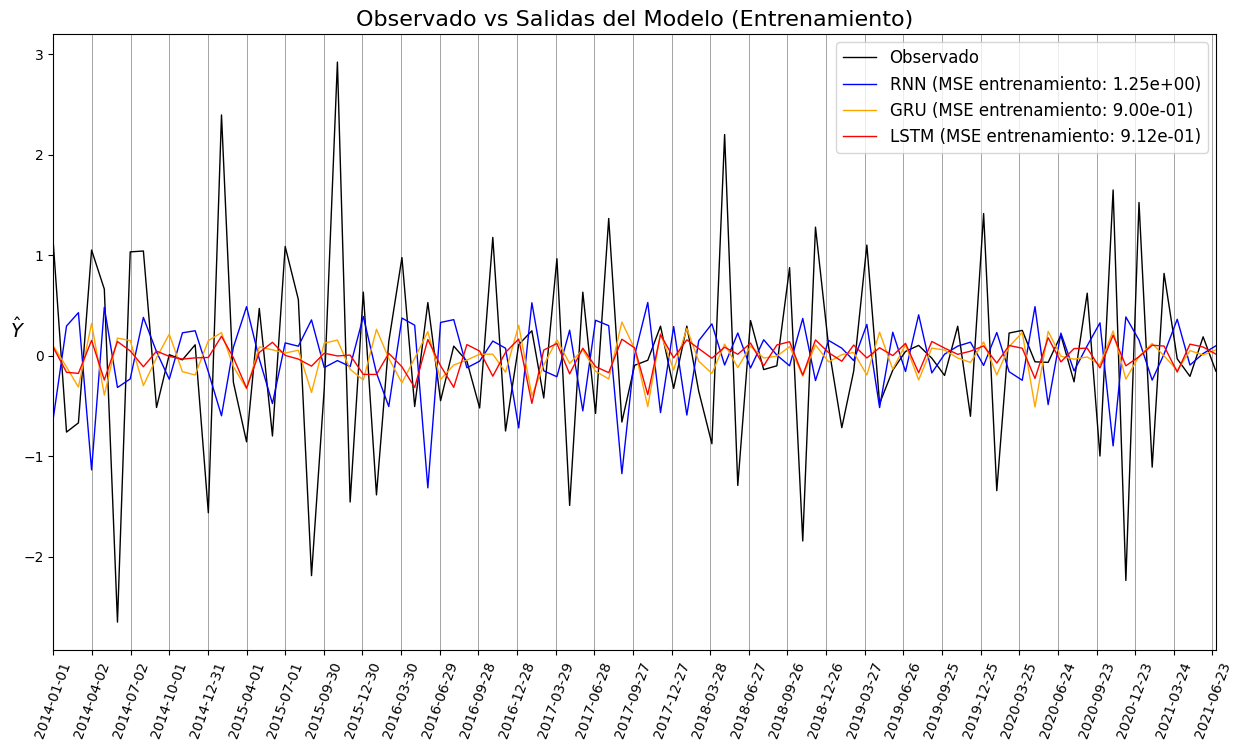

In [69]:
import matplotlib.pyplot as plt
from datetime import timedelta

# Definir parámetros de visualización
max_pts = 10**4
compare = params.keys()  # Lista de modelos a comparar
l, u = (None, None)  # Índices inferior y superior para restringir el rango a graficar
ds = max(1, len(y_train[l:u]) // max_pts)  # Ratio de muestreo para limitar puntos a `max_pts` por serie

# Crear la figura con tamaño adecuado
fig, ax = plt.subplots(figsize=(15, 8))

# Extraer valores de tiempo y observaciones
x_vals = y_train_timestamps[l:u:ds]
observed_vals = y_train[l:u:ds]

# Graficar observaciones
ax.plot(x_vals, observed_vals, c="black", label="Observado", lw=1)

# Graficar predicciones de cada modelo
for key in compare:
    y_vals = params[key]['pred_train'][l:u:ds]
    label = f"{params[key]['label']} (MSE entrenamiento: {params[key]['MSE_train']:.2e})"
    ax.plot(x_vals, y_vals, c=params[key]['color'], label=label, lw=1)

# Configuración adicional y decoración
start, end = x_vals.min(), x_vals.max()
xticks = [start.date() + timedelta(days=i) for i in range((end - start).days + 1)]
xticks = xticks[::max(1, len(xticks) // 30)]

for t in xticks:
    ax.axvline(x=t, c='gray', linewidth=0.5, zorder=0)

ax.set_xticks(xticks)
ax.set_xticklabels([str(t) for t in xticks], rotation=70)
ax.set_xlim(start, end)

# Etiquetas y leyenda
ax.set_ylabel('$\hat{Y}$', rotation=0, fontsize=14)
ax.legend(loc="best", fontsize=12)

# Título del gráfico
ax.set_title('Observado vs Salidas del Modelo (Entrenamiento)', fontsize=16)

# Mostrar la gráfica
plt.show()

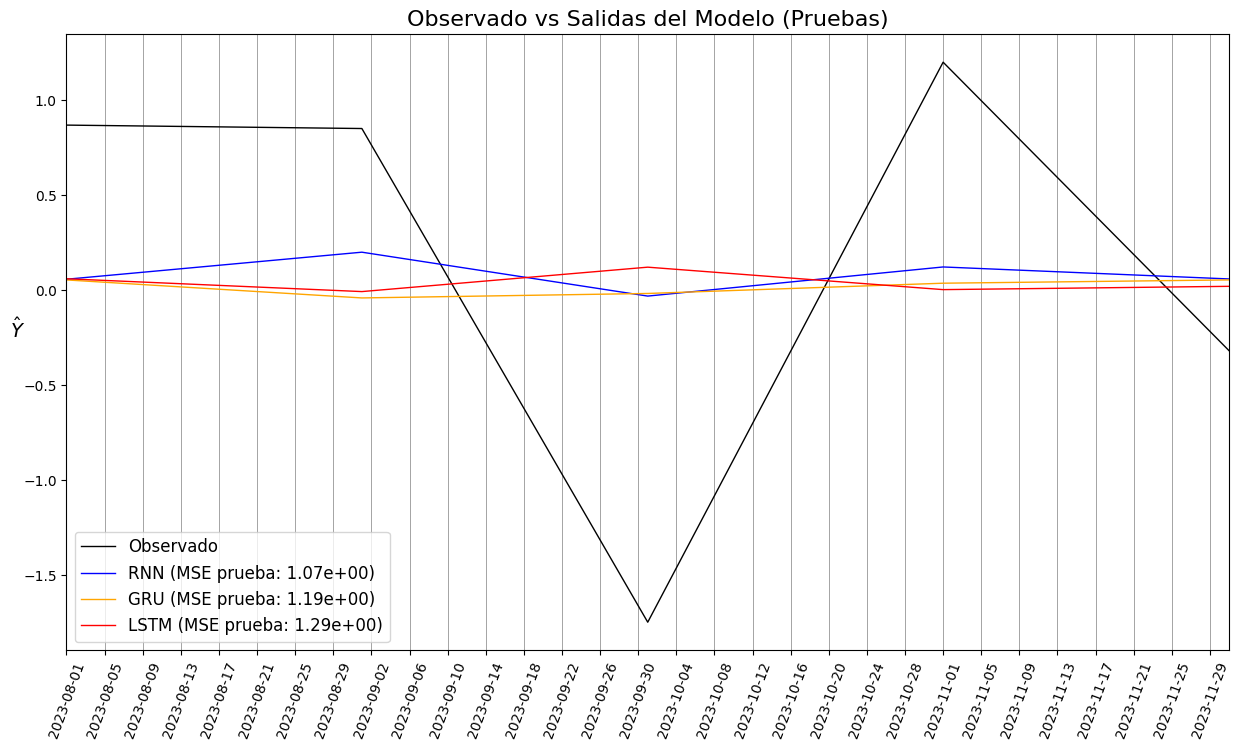

In [70]:
import matplotlib.pyplot as plt
from datetime import timedelta

# Definir parámetros de visualización
max_pts = 10**4
compare = params.keys()  # Lista de modelos a comparar
l, u = (None, None)  # Índices inferior y superior para restringir el rango a graficar
ds = max(1, len(y_test[l:u]) // max_pts)  # Ratio de muestreo para limitar puntos a `max_pts` por serie

# Crear la figura con tamaño adecuado
fig, ax = plt.subplots(figsize=(15, 8))

# Extraer valores de tiempo y observaciones
x_vals = y_test_timestamps[l:u:ds]
observed_vals = y_test[l:u:ds]

# Graficar observaciones
ax.plot(x_vals, observed_vals, c="black", label="Observado", lw=1)

# Graficar predicciones de cada modelo
for key in compare:
    y_vals = params[key]['pred_test'][l:u:ds]
    label = f"{params[key]['label']} (MSE prueba: {params[key]['MSE_test']:.2e})"
    ax.plot(x_vals, y_vals, c=params[key]['color'], label=label, lw=1)

# Configuración adicional y decoración
start, end = x_vals.min(), x_vals.max()
xticks = [start.date() + timedelta(days=i) for i in range((end - start).days + 1)]
xticks = xticks[::max(1, len(xticks) // 30)]

for t in xticks:
    ax.axvline(x=t, c='gray', linewidth=0.5, zorder=0)

ax.set_xticks(xticks)
ax.set_xticklabels([str(t) for t in xticks], rotation=70)
ax.set_xlim(start, end)

# Etiquetas y leyenda
ax.set_ylabel('$\hat{Y}$', rotation=0, fontsize=14)
ax.legend(loc="best", fontsize=12)

# Título del gráfico
ax.set_title('Observado vs Salidas del Modelo (Pruebas)', fontsize=16)

# Mostrar la gráfica
plt.show()

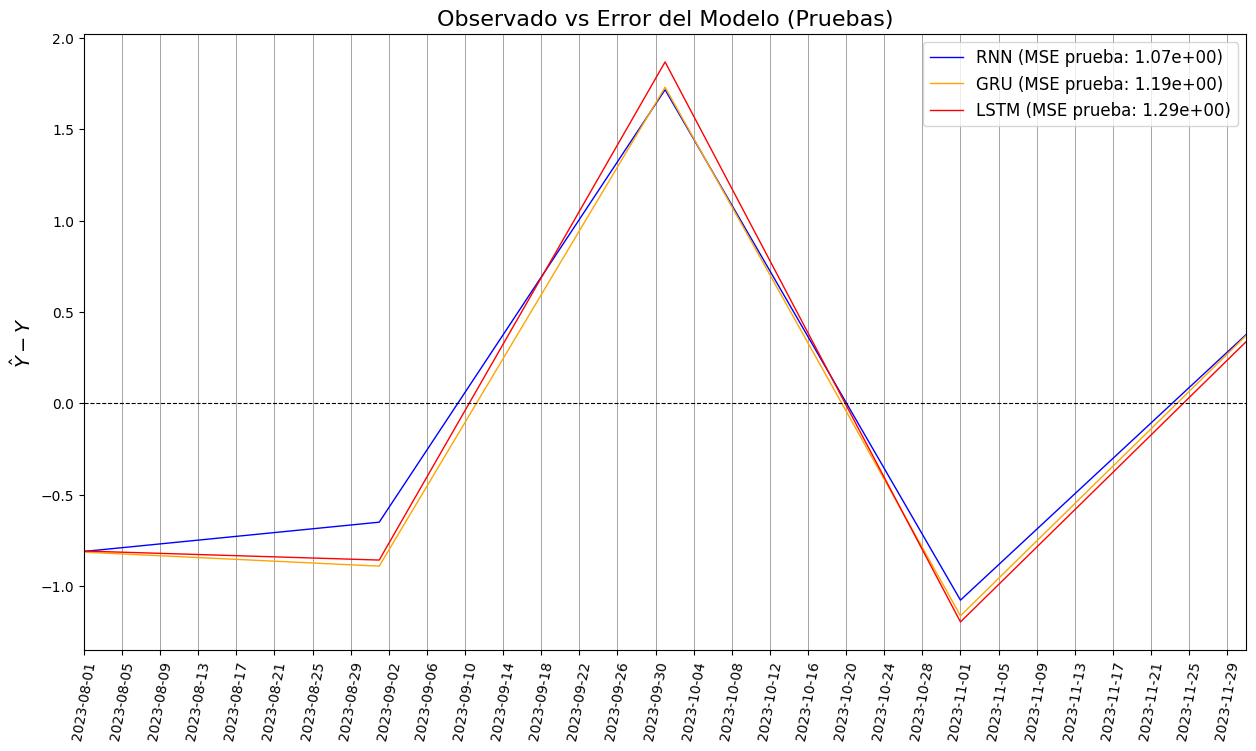

In [71]:
import matplotlib.pyplot as plt
from datetime import timedelta

# Definir parámetros de visualización
max_pts = 10**4
compare = params.keys()  # Lista de modelos a comparar
l, u = (None, None)  # Índices inferior y superior para restringir el rango a graficar
ds = max(1, len(y_test[l:u]) // max_pts)  # Ratio de muestreo para limitar puntos a `max_pts` por serie

# Crear la figura con tamaño adecuado
fig, ax = plt.subplots(figsize=(15, 8))

# Extraer valores de tiempo y errores de predicción
x_vals = y_test_timestamps[l:u:ds]
for key in compare:
    y_vals = params[key]['pred_test'][l:u:ds] - y_test[l:u:ds]
    label = f"{params[key]['label']} (MSE prueba: {params[key]['MSE_test']:.2e})"
    ax.plot(x_vals, y_vals, c=params[key]['color'], label=label, lw=1)

# Configuración adicional y decoración
start, end = x_vals.min(), x_vals.max()
xticks = [start.date() + timedelta(days=i) for i in range((end - start).days + 1)]
xticks = xticks[::max(1, len(xticks) // 30)]

ax.axhline(0, linewidth=0.8, color='black', linestyle='--')  # Línea horizontal en y=0 para referencia

for t in xticks:
    ax.axvline(x=t, c='gray', linewidth=0.5, zorder=0)

ax.set_xticks(xticks)
ax.set_xticklabels([str(t) for t in xticks], rotation=80)
ax.set_xlim(start, end)

# Etiquetas y leyenda
ax.set_ylabel('$\hat{Y}-Y$', fontsize=14)
ax.legend(loc="best", fontsize=12)

# Título del gráfico
ax.set_title('Observado vs Error del Modelo (Pruebas)', fontsize=16)

# Mostrar la gráfica
plt.show()

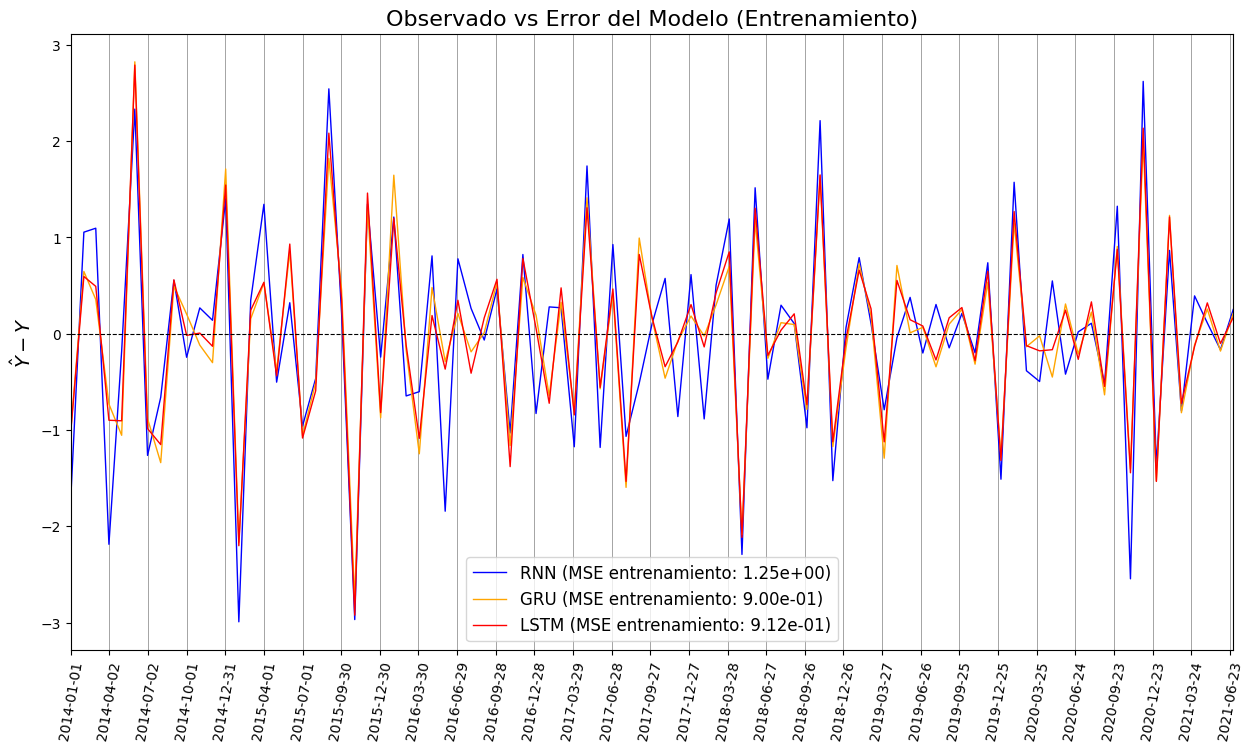

In [72]:
import matplotlib.pyplot as plt
from datetime import timedelta

# Definir parámetros de visualización
max_pts = 10**4
compare = params.keys()  # Lista de modelos a comparar
l, u = (None, None)  # Índices inferior y superior para restringir el rango a graficar
ds = max(1, len(y_train[l:u]) // max_pts)  # Ratio de muestreo para limitar puntos a `max_pts` por serie

# Crear la figura con tamaño adecuado
fig, ax = plt.subplots(figsize=(15, 8))

# Extraer valores de tiempo y errores de predicción
x_vals = y_train_timestamps[l:u:ds]
for key in compare:
    y_vals = params[key]['pred_train'][l:u:ds] - y_train[l:u:ds]
    label = f"{params[key]['label']} (MSE entrenamiento: {params[key]['MSE_train']:.2e})"
    ax.plot(x_vals, y_vals, c=params[key]['color'], label=label, lw=1)

# Configuración adicional y decoración
start, end = x_vals.min(), x_vals.max()
xticks = [start.date() + timedelta(days=i) for i in range((end - start).days + 1)]
xticks = xticks[::max(1, len(xticks) // 30)]

ax.axhline(0, linewidth=0.8, color='black', linestyle='--')  # Línea horizontal en y=0 para referencia

for t in xticks:
    ax.axvline(x=t, c='gray', linewidth=0.5, zorder=0)

ax.set_xticks(xticks)
ax.set_xticklabels([str(t) for t in xticks], rotation=80)
ax.set_xlim(start, end)

# Etiquetas y leyenda
ax.set_ylabel('$\hat{Y}-Y$', fontsize=14)
ax.legend(loc="best", fontsize=12)

# Título del gráfico
ax.set_title('Observado vs Error del Modelo (Entrenamiento)', fontsize=16)

# Mostrar la gráfica
plt.show()